In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
ram_prices = pd.read_csv("ram_price.csv")

Text(0, 0.5, 'Price in $/Mbyte')

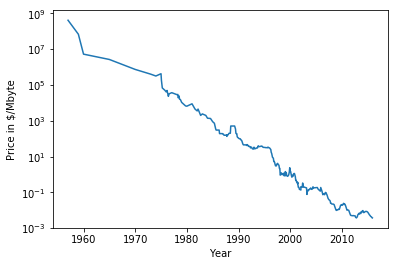

In [2]:
plt.semilogy(ram_prices.date, ram_prices.price) # Make a plot with log scaling on the y axis
plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte")

In [3]:
from sklearn.tree import DecisionTreeRegressor

# use historical data to forecast prices after the year 2000
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

In [4]:
# predict prices based on date
X_train = data_train.date[:, np.newaxis]

In [5]:
# use a log-transform to get a simpler relationship of data to target
y_train = np.log(data_train.price)

In [6]:
tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

In [7]:
# predict on all data
X_all = ram_prices.date[:, np.newaxis]

In [8]:
pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

In [9]:
# undo log-transform
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

Text(0.5, 1.0, 'Decision tree model drawback')

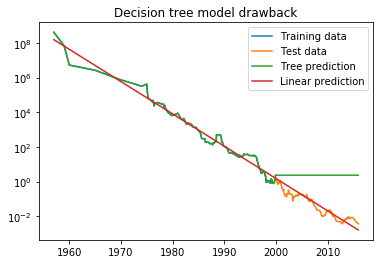

In [10]:
plt.semilogy(data_train.date, data_train.price, label="Training data")
plt.semilogy(data_test.date, data_test.price, label="Test data")
plt.semilogy(ram_prices.date, price_tree, label="Tree prediction")
plt.semilogy(ram_prices.date, price_lr, label="Linear prediction")
plt.legend()
plt.title("Decision tree model drawback")

# no generalization